An Eigenfaces Session with python
==========
This session aims to demonstrate the use of scikit in python using an eigenfaces exercise. First will construct a class for storing the information of the chamber of representatives. Later we will import the image dataset, compute some descriptive statistics, perform an analysis of principal components, clustering analysis and finally will use a non-linear classifier to assess the gender from just the image of the representative. 

Diputado Class
-----
A diputado has a Name, Surnames, ID, Picture, Gender and Political Affiliation

In [1]:
%pylab inline
class Diputado(object):
    def __init__(self,ind,fileRoot="./"):
        self.name=""
        self.surname=""
        self.ind=ind
        self.picfile=""
        self.party=""
        self.gender=""
        self.fileRoot=fileRoot
        self.ext="c.jpg" 
    def setName(self,name):
        self.name=name
    def setSurname(self,surname):
        self.surname=surname
    def setParty(self,party):
        self.party=party
    def setGender(self,gender):
        self.gender=gender
    def getName(self):
        return self.name
    def getSurname(self):
        return self.surname
    def getInd(self):
        return self.ind
    def getPicfile(self):
        return self.fileRoot + str(self.ind) + self.ext
    def getParty(self):
        return self.party
    def getGender(self):
        return self.gender
       

Populating the interactive namespace from numpy and matplotlib


Parlament class
-----
Let's define a very simple Parlament object, where we store the diputados objects. From this class, we have to be able to get information from the parlament.

In [2]:
class Parlament(object):
    def __init__(self):
        self.elements=[]
        self.inds=[]
        self.ndips=0
    def add(self, diputado):
        self.elements.append(diputado)
        self.inds.append(diputado.getInd())
        self.ndips +=1
    def getInds(self):
        return [self.elements[i].getInd() for i in range(self.ndips)]
    def len(self):
        return len(self.elements)
    def __getitem__(self, key):
        if isinstance(key, slice):
            indices = key.indices(self.ndips)
            return [self[ii] for ii in xrange(*key.indices(self.len()))] 
        else:
            return self.elements[key]
    def getName(self,key):
        return self.elements[key].getName()
        

In [5]:
import csv
with open('db/index.csv','r') as csvfile:
    r = csv.reader(csvfile, delimiter=';')
    r.__next__()
    p = Parlament()
    for row in r:
        n = Diputado(int(row[0]),"db/db/")
        n.setName(row[1].strip())
        n.setSurname(row[2].strip())
        n.setGender(row[3].strip())
        n.setParty(row[4].strip())
        p.add(n)


In [6]:
p.len()
p[99].getPicfile()

'db/db/91c.jpg'

Let's create a dataset of the analysis.


'Joan|Tardà i Coma|H'

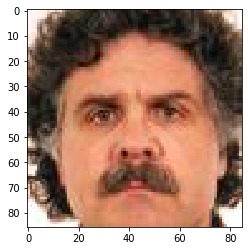

In [9]:
from scipy import ndimage,misc
import numpy as np
import matplotlib.pyplot as pl
idip = 129
I = pl.imread(p[idip].getPicfile())
pl.imshow(I)
np.shape(I)
'|'.join([p[idip].getName(), p[idip].getSurname(), p[idip].getGender()])

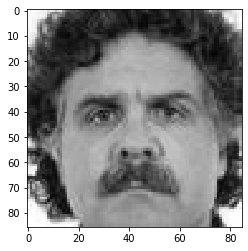

In [11]:
I = pl.imread(p[idip].getPicfile()).mean(axis=2)
img=pl.imshow(I)
img.set_cmap('gray')
Is=shape(I)


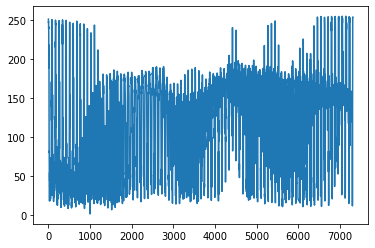

In [12]:
Iv = np.reshape(I,np.prod(Is))
pl.plot(Iv)

Let's stack all images to an array and create a couple of dependent variables.

In [14]:
X=np.array([ pl.imread(d.getPicfile()).mean(axis=2).ravel()
             for d in p])
shape(X)
Yg=np.array([ d.getGender() for d in p])
Yp=np.array([ d.getParty() for d in p])
Yp[0:5],Yg[0:5],shape(X)

(array(['GS', 'GS', 'GC-CiU', 'GP', 'GP'], dtype='<U10'),
 array(['H', 'M', 'H', 'H', 'H'], dtype='<U1'),
 (348, 7310))

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


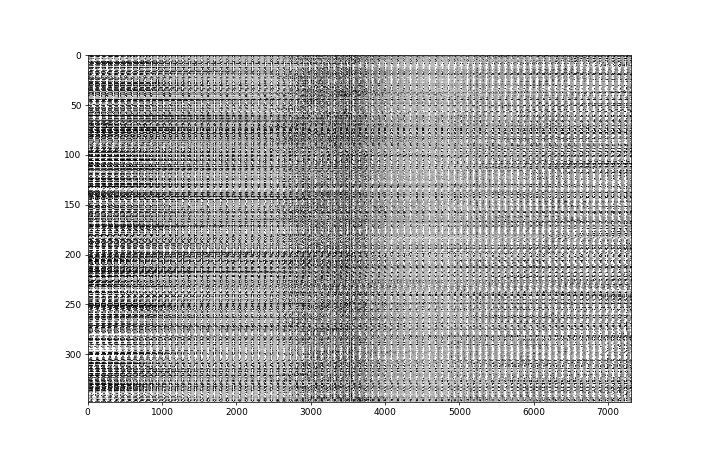

In [22]:
%pylab notebook 
pl.imshow(X,aspect='auto')
pl.set_cmap('gray')
